### Import dependencies

In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
#from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Read country level data and merge with country level code  

In [4]:
country_code = "/Users/shilpa/Desktop/Boringppl_project/WasteManagement/Data/country_level_codebook.csv"
country_code_df = pd.read_csv(country_code, encoding = 'utf-8')
#country_code_df.head(2)


country_data = "/Users/shilpa/Desktop/Boringppl_project/WasteManagement/Data/country_level_data_0.csv"
country_data_df = pd.read_csv(country_data, encoding = 'utf-8')
#country_data_df.head(2)


world_merge = pd.merge(country_data_df, country_code_df, on='country_name')
#world_merge.head(2)


grouped = world_merge.groupby('year')
world_group_2017 = grouped.get_group('2017')
#world_group_2017.head()


world_group_2017.columns

List_Of_Categories_In_Column = list(world_group_2017['income_id'].value_counts().index)
List_Of_Categories_In_Column

['UMC', 'HIC', 'LMC', 'LIC']

### EDA on waste generated columns after grouping based on income_id

In [115]:
df_waste_generated = world_group_2017[['country_name', 
                                    'income_id', 
                                    'gdp', 
                                    'population_population_number_of_people',
                                    'composition_food_organic_waste_percent', 
                                    'composition_glass_percent',
                                    'composition_metal_percent', 
                                    'composition_other_percent',
                                    'composition_paper_cardboard_percent', 
                                    'composition_plastic_percent',
                                    'composition_rubber_leather_percent', 
                                    'composition_wood_percent',
                                    'composition_yard_garden_green_waste_percent']]
df_waste_generated.fillna(0).head(2)
#Nan values were converted too zeros because dtypes were float


,country_name,income_id,gdp,population_population_number_of_people,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent
538,Bhutan,LMC,2.234759e+09,686958.0,58.0,4.0,1.0,7.0,17.0,13.0,0.0,0.0,0.0
905,Dominican Republic,UMC,7.366413e+10,10528394.0,51.0,6.0,3.0,10.0,16.0,10.0,0.0,4.0,0.0


In [116]:
waste_generated = df_waste_generated.rename(columns={'country_name': 'Country', 
                                'income_id': "Income",
                                'gdp': 'GDP', 
                                'population_population_number_of_people': 'Population',
                                'composition_food_organic_waste_percent': '%_Organic', 
                                'composition_glass_percent': '%_Glass',
                                'composition_metal_percent': '%_Metal', 
                                'composition_other_percent': '%_Other',
                                'composition_paper_cardboard_percent': '%_Cardboard', 
                                'composition_plastic_percent': '%_Plastic',
                                'composition_rubber_leather_percent': '%_Rubber_Leather', 
                                'composition_wood_percent': '%_Wood',
                                'composition_yard_garden_green_waste_percent': '%_Yard_Garden'})

waste_generated.head()

,Country,Income,GDP,Population,%_Organic,%_Glass,%_Metal,%_Other,%_Cardboard,%_Plastic,%_Rubber_Leather,%_Wood,%_Yard_Garden
538,Bhutan,LMC,2.234759e+09,686958.0,58.0,4.0,1.0,7.0,17.0,13.0,NaN,NaN,NaN
905,Dominican Republic,UMC,7.366413e+10,10528394.0,51.0,6.0,3.0,10.0,16.0,10.0,NaN,4.0,NaN
911,Dominican Republic,UMC,7.366413e+10,10528394.0,51.0,6.0,3.0,10.0,16.0,10.0,NaN,4.0,NaN
913,Dominican Republic,UMC,7.366413e+10,10528394.0,51.0,6.0,3.0,10.0,16.0,10.0,NaN,4.0,NaN
918,Algeria,UMC,1.960348e+11,40606052.0,54.4,1.2,2.8,0.8,9.8,16.9,12.6,1.5,NaN


In [117]:
waste_generated_LIC = waste_generated.groupby('Income').get_group('LIC').fillna(0).drop_duplicates().set_index('Country')
waste_generated_LIC.columns


Index(['Income', 'GDP', 'Population', '%_Organic', '%_Glass', '%_Metal',
       '%_Other', '%_Cardboard', '%_Plastic', '%_Rubber_Leather', '%_Wood',
       '%_Yard_Garden'],
      dtype='object')

<IPython.core.display.Javascript object>


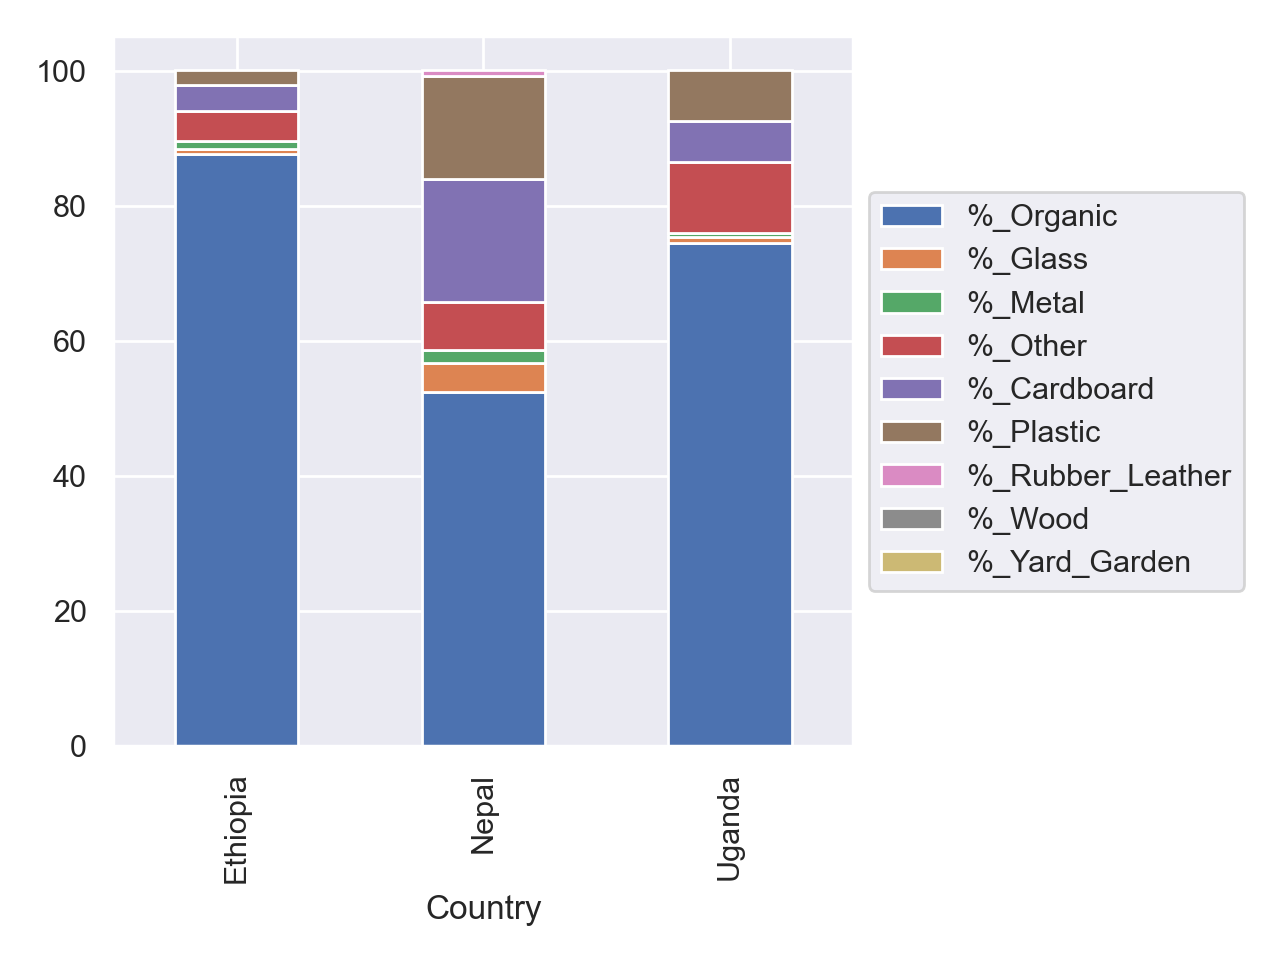

In [126]:
LIC_waste = pd.DataFrame(waste_generated_LIC, columns =[
       '%_Organic', '%_Glass', '%_Metal',
       '%_Other', '%_Cardboard', '%_Plastic', '%_Rubber_Leather', '%_Wood', '%_Yard_Garden'])
LIC_waste.plot.bar(legend=True, stacked=True);
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.tight_layout()

In [127]:
waste_generated_LMC = waste_generated.groupby('Income').get_group('LMC').fillna(0).drop_duplicates().set_index('Country')
waste_generated_LMC

,Income,GDP,Population,%_Organic,%_Glass,%_Metal,%_Other,%_Cardboard,%_Plastic,%_Rubber_Leather,%_Wood,%_Yard_Garden
Country,,,,,,,,,,,,
Bhutan,LMC,2.234759e+09,6.869580e+05,58.0,4.0,1.0,7.0,17.0,13.0,0.0,0.0,0.0
Indonesia,LMC,1.037864e+12,2.611155e+08,53.8,2.5,1.8,12.9,14.9,14.0,0.0,0.0,0.0
India,LMC,2.466177e+12,1.071478e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sri Lanka,LMC,7.990704e+10,2.120300e+07,62.0,2.0,3.0,13.0,7.0,7.0,0.0,6.0,0.0
Myanmar,LMC,7.446983e+10,4.609546e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pakistan,LMC,2.278669e+11,1.932035e+08,30.0,6.0,4.0,20.0,13.0,9.0,2.0,2.0,14.0


<IPython.core.display.Javascript object>


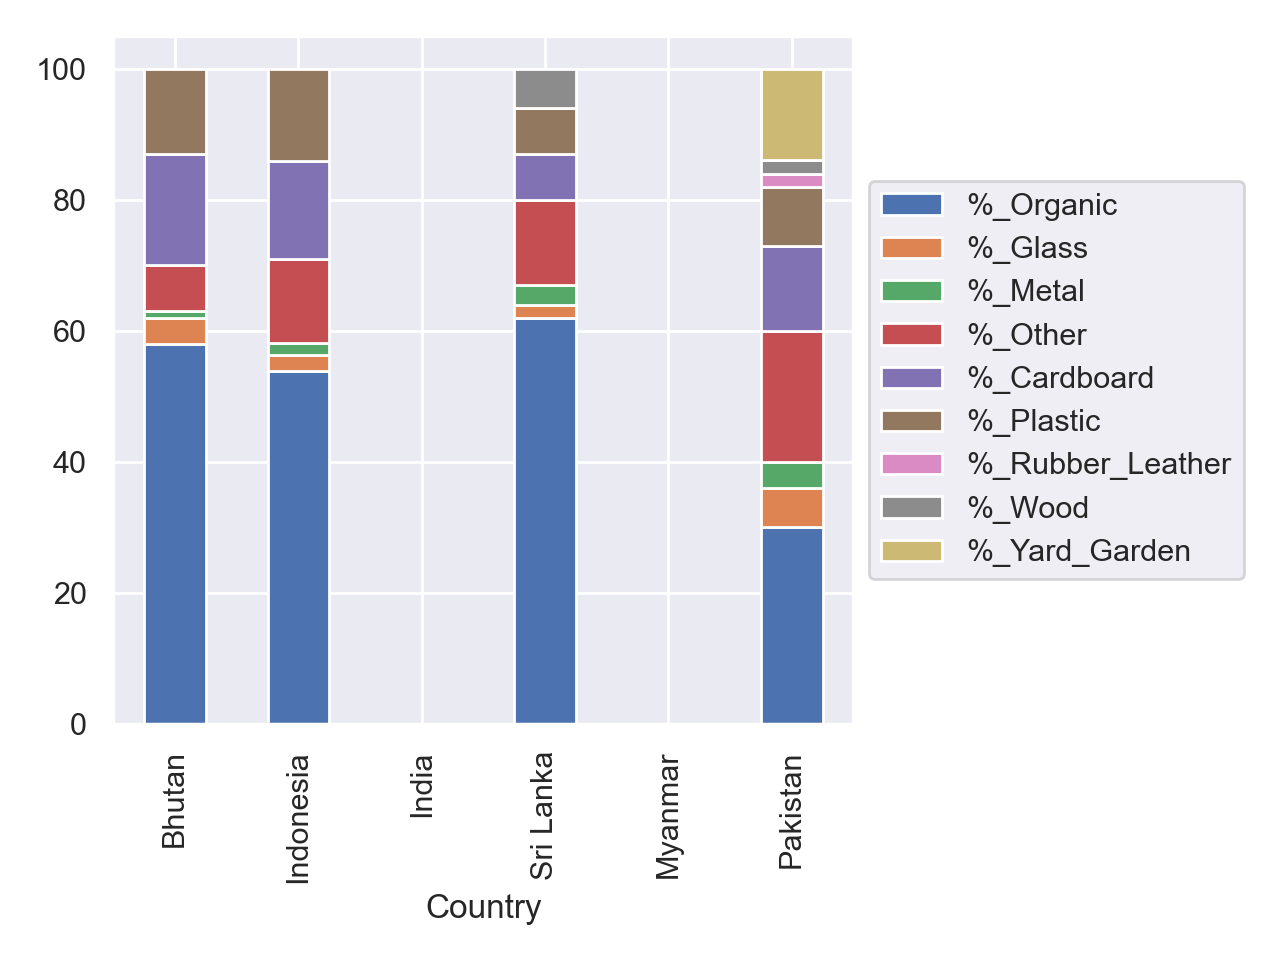

In [128]:
LMC_waste = pd.DataFrame(waste_generated_LMC, columns =[
       '%_Organic', '%_Glass', '%_Metal',
       '%_Other', '%_Cardboard', '%_Plastic', '%_Rubber_Leather', '%_Wood', '%_Yard_Garden'])
LMC_waste.plot.bar(legend=True, stacked=True);
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.tight_layout()

In [129]:
waste_generated_UMC = waste_generated.groupby('Income').get_group('UMC').fillna(0).drop_duplicates().set_index('Country')
waste_generated_UMC
# Nan values converted to zeros

,Income,GDP,Population,%_Organic,%_Glass,%_Metal,%_Other,%_Cardboard,%_Plastic,%_Rubber_Leather,%_Wood,%_Yard_Garden
Country,,,,,,,,,,,,
Dominican Republic,UMC,7.366413e+10,10528394.0,51.0,6.0,3.0,10.0,16.0,10.0,0.0,4.0,0.0
Algeria,UMC,1.960348e+11,40606052.0,54.4,1.2,2.8,0.8,9.8,16.9,12.6,1.5,0.0
"Iran, Islamic Rep.",UMC,5.405812e+11,80277428.0,72.9,1.9,2.3,5.0,7.3,8.5,1.1,1.3,0.0
Maldives,UMC,3.600399e+09,409163.0,24.0,0.0,1.0,1.0,6.0,3.0,0.0,0.0,65.0
Mauritius,UMC,1.240984e+10,1263473.0,64.0,2.8,0.0,8.0,13.0,12.4,0.0,0.0,0.0
Malaysia,UMC,3.440523e+11,30228017.0,46.0,3.0,3.0,9.0,14.0,15.0,3.0,7.0,0.0


<IPython.core.display.Javascript object>


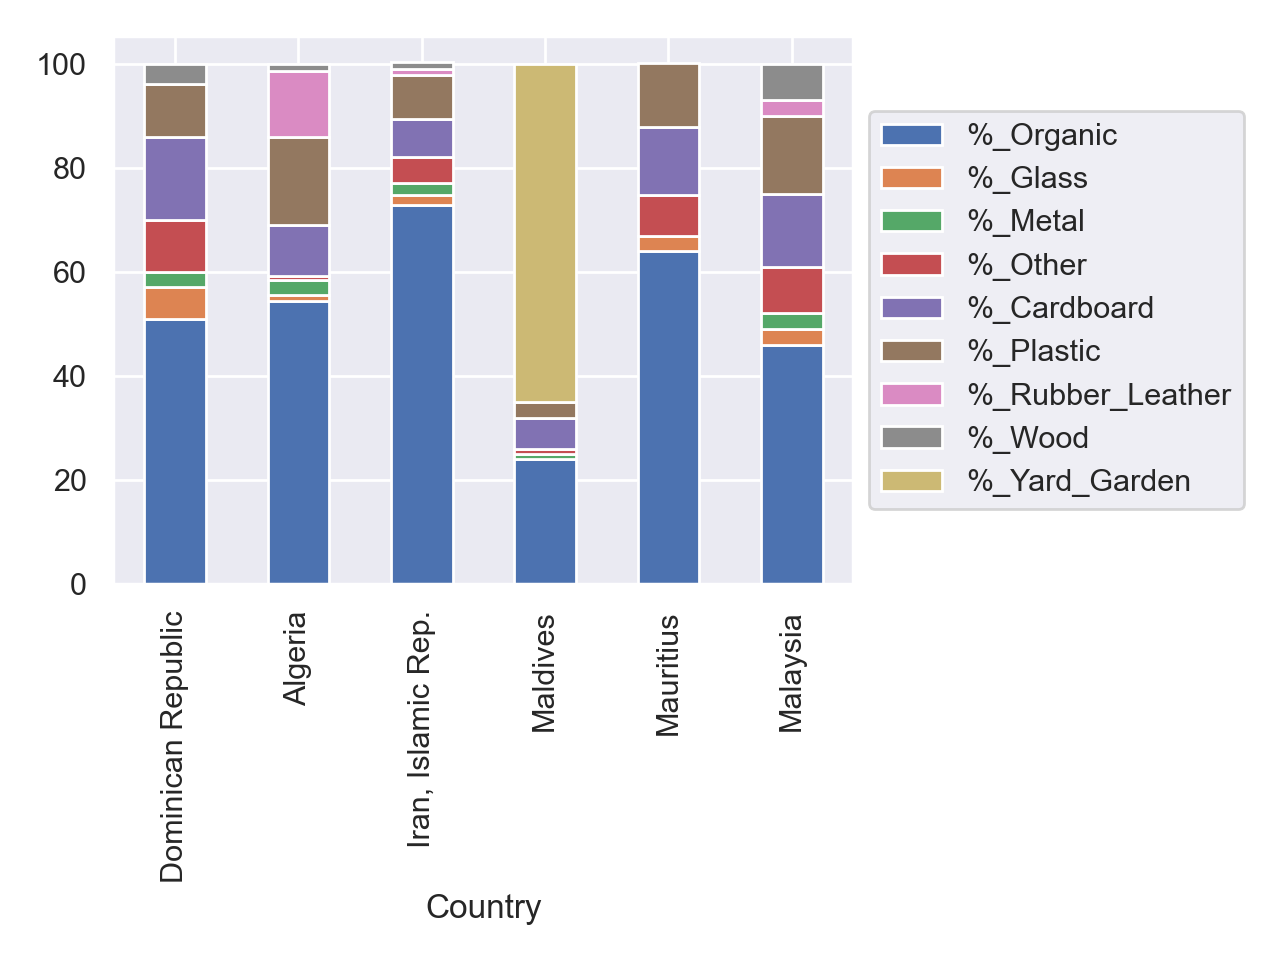

In [130]:
UMC_waste = pd.DataFrame(waste_generated_UMC, columns =[
       '%_Organic', '%_Glass', '%_Metal',
       '%_Other', '%_Cardboard', '%_Plastic', '%_Rubber_Leather', '%_Wood', '%_Yard_Garden'])
UMC_waste.plot.bar(legend=True, stacked=True);
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.tight_layout()

In [131]:
waste_generated_HIC = waste_generated.groupby('Income').get_group('HIC').fillna(0).drop_duplicates().set_index('Country')
waste_generated_HIC
# Nan values converted to zeros

,Income,GDP,Population,%_Organic,%_Glass,%_Metal,%_Other,%_Cardboard,%_Plastic,%_Rubber_Leather,%_Wood,%_Yard_Garden
Country,,,,,,,,,,,,
"Hong Kong SAR, China",HIC,2.701054e+11,7305700.0,35.00,3.00,2.00,14.0,22.00,21.00,0.00,3.0,0.00
Israel,HIC,2.878076e+11,8380100.0,34.00,3.00,3.00,16.0,24.00,18.00,0.00,0.0,2.00
St. Kitts and Nevis,HIC,8.583447e+08,54288.0,27.20,8.10,8.80,12.2,20.50,23.20,0.00,0.0,0.00
Oman,HIC,7.505436e+10,3960925.0,27.00,6.00,0.00,24.0,15.00,21.00,0.00,2.0,5.00
Qatar,HIC,1.706626e+11,2109568.0,57.00,4.00,9.00,5.0,11.00,14.00,0.00,0.0,0.00
Saudi Arabia,HIC,6.900688e+11,31557144.0,45.50,4.00,5.00,2.5,27.00,11.00,0.00,5.0,0.00
Singapore,HIC,2.991701e+11,5607283.0,10.51,0.93,19.12,32.3,14.86,10.58,1.96,5.5,4.26


<IPython.core.display.Javascript object>


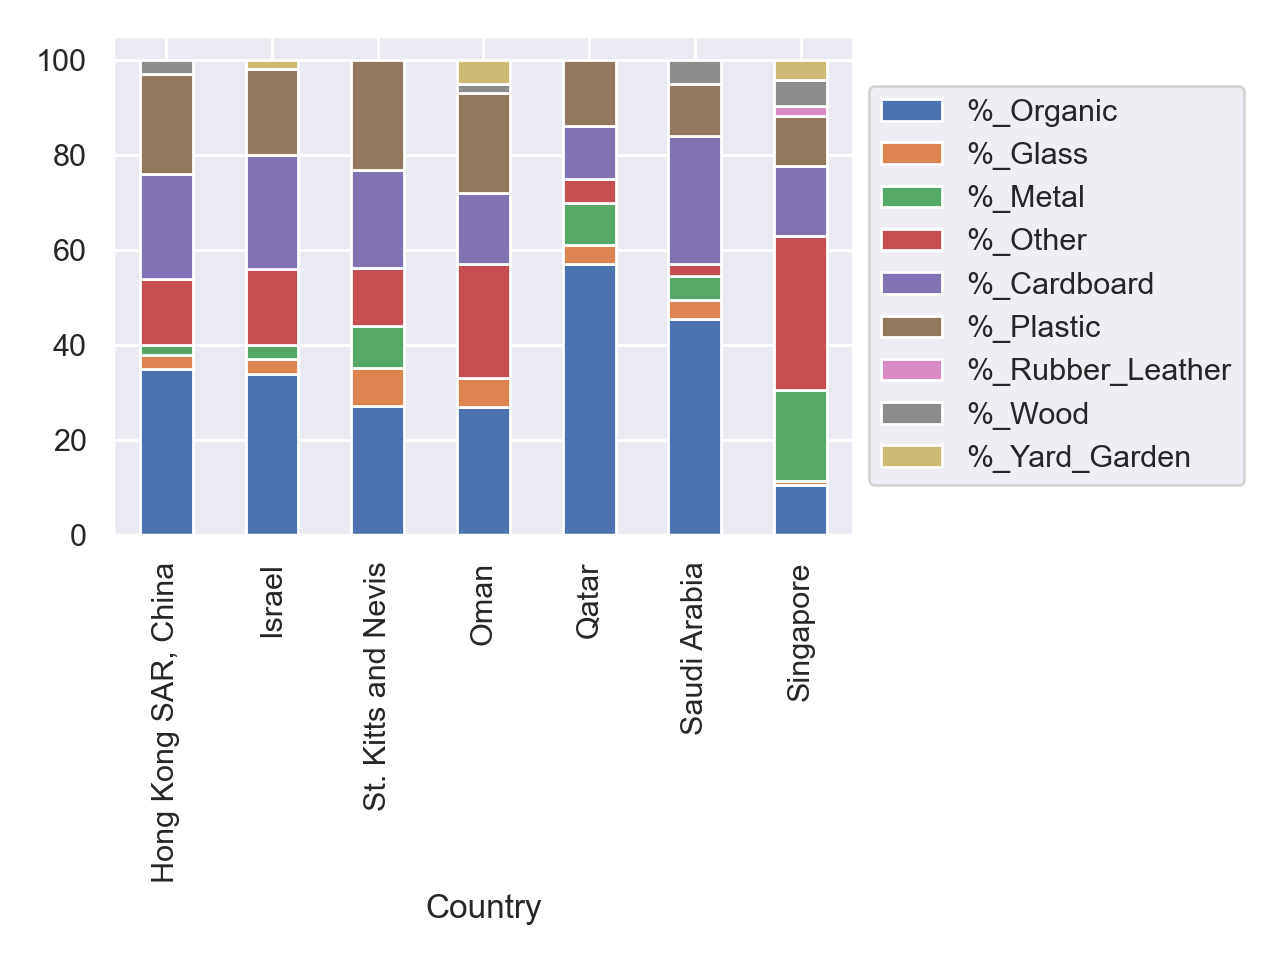

In [132]:
HIC_waste = pd.DataFrame(waste_generated_HIC, columns =[
      '%_Organic', '%_Glass', '%_Metal',
       '%_Other', '%_Cardboard', '%_Plastic', '%_Rubber_Leather', '%_Wood', '%_Yard_Garden'])
HIC_waste.plot.bar(legend=True, stacked=True);
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.tight_layout()

# EDA on waste information columns after grouping based on income_id

In [74]:
waste_information = world_group_2017[[
        'country_name', 
        'income_id', 'gdp', 
        'population_population_number_of_people',
        'other_information_information_system_for_solid_waste_management',
        'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations',
        'other_information_national_law_governing_solid_waste_management_in_the_country',
        'other_information_ppp_rules_and_regulations',
        'other_information_summary_of_key_solid_waste_information_made_available_to_the_public']]
waste_information.fillna('No info').drop_duplicates().set_index('country_name')



# Converted Nan values to no info 

,income_id,gdp,population_population_number_of_people,other_information_information_system_for_solid_waste_management,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations,other_information_national_law_governing_solid_waste_management_in_the_country,other_information_ppp_rules_and_regulations,other_information_summary_of_key_solid_waste_information_made_available_to_the_public
country_name,,,,,,,,
Bhutan,LMC,2.234759e+09,6.869580e+05,No,Yes,Yes,Yes,Yes
Dominican Republic,UMC,7.366413e+10,1.052839e+07,No,Yes,No,No,No info
Algeria,UMC,1.960348e+11,4.060605e+07,Yes,Yes,Yes,No info,Yes
Ethiopia,LIC,5.234723e+10,9.987303e+07,No info,Yes,Yes,No info,No info
"Hong Kong SAR, China",HIC,2.701054e+11,7.305700e+06,Yes,Yes,Yes,Yes,Yes
Indonesia,LMC,1.037864e+12,2.611155e+08,No info,Yes,Yes,Yes,No info
India,LMC,2.466177e+12,1.071478e+09,No,Yes,Yes,Yes,Yes
"Iran, Islamic Rep.",UMC,5.405812e+11,8.027743e+07,No,Yes,Yes,Yes,No
Israel,HIC,2.878076e+11,8.380100e+06,No info,Yes,Yes,No info,Yes


In [75]:
waste_information.dtypes

country_name                                                                              object
income_id                                                                                 object
gdp                                                                                      float64
population_population_number_of_people                                                   float64
other_information_information_system_for_solid_waste_management                           object
other_information_national_agency_to_enforce_solid_waste_laws_and_regulations             object
other_information_national_law_governing_solid_waste_management_in_the_country            object
other_information_ppp_rules_and_regulations                                               object
other_information_summary_of_key_solid_waste_information_made_available_to_the_public     object
dtype: object

In [76]:
df  = waste_information[[
        'country_name',
        'income_id',
        'other_information_information_system_for_solid_waste_management',
        'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations',
        'other_information_national_law_governing_solid_waste_management_in_the_country',
        'other_information_ppp_rules_and_regulations',
        'other_information_summary_of_key_solid_waste_information_made_available_to_the_public']]\
        .fillna('No info').drop_duplicates().set_index('country_name').replace({'other_information_national_law_governing_solid_waste_management_in_the_country': {'yes': 'Yes'}})
df

,income_id,other_information_information_system_for_solid_waste_management,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations,other_information_national_law_governing_solid_waste_management_in_the_country,other_information_ppp_rules_and_regulations,other_information_summary_of_key_solid_waste_information_made_available_to_the_public
country_name,,,,,,
Bhutan,LMC,No,Yes,Yes,Yes,Yes
Dominican Republic,UMC,No,Yes,No,No,No info
Algeria,UMC,Yes,Yes,Yes,No info,Yes
Ethiopia,LIC,No info,Yes,Yes,No info,No info
"Hong Kong SAR, China",HIC,Yes,Yes,Yes,Yes,Yes
Indonesia,LMC,No info,Yes,Yes,Yes,No info
India,LMC,No,Yes,Yes,Yes,Yes
"Iran, Islamic Rep.",UMC,No,Yes,Yes,Yes,No
Israel,HIC,No info,Yes,Yes,No info,Yes


In [77]:
df1 = (df.melt('income_id', value_name='Response')
       .groupby(['income_id', 'Response', 'variable'])
       .size()
       .unstack(fill_value=0)
       .rename_axis(None, axis=1))
df1

other_information_information_system_for_solid_waste_management  \
income_id Response                                                                    
HIC       No                                                        1                 
          No info                                                   1                 
          Yes                                                       5                 
LIC       No info                                                   3                 
          Yes                                                       0                 
LMC       No                                                        3                 
          No info                                                   2                 
          Yes                                                       1                 
UMC       No                                                        4                 
          No info                                                   1                 
          Yes                                                       1                 

                    other_information_national_agency_to_enforce_solid_waste_laws_and_regulations  \
income_id Response                                                                                  
HIC       No                                                        0                               
          No info                                                   0                               
          Yes                                                       7                               
LIC       No info                                                   1                               
          Yes                                                       2                               
LMC       No                                                        0                               
          No info                                                   0                               
          Yes                                                       6                               
UMC       No                                                        0                               
          No info                                                   1                               
          Yes                                                       5                               

                    other_information_national_law_governing_solid_waste_management_in_the_country  \
income_id Response                                                                                   
HIC       No                                                        0                                
          No info                                                   0                                
          Yes                                                       7                                
LIC       No info                                                   1                                
          Yes                                                       2                                
LMC       No                                                        1                                
          No info                                                   0                                
          Yes                                                       5                                
UMC       No                                                        1                                
          No info                                                   0                                
          Yes                                                       5                                

                    other_information_ppp_rules_and_regulations  \
income_id Response                                                
HIC       No                                                  1   
          No info                             

<IPython.core.display.Javascript object>


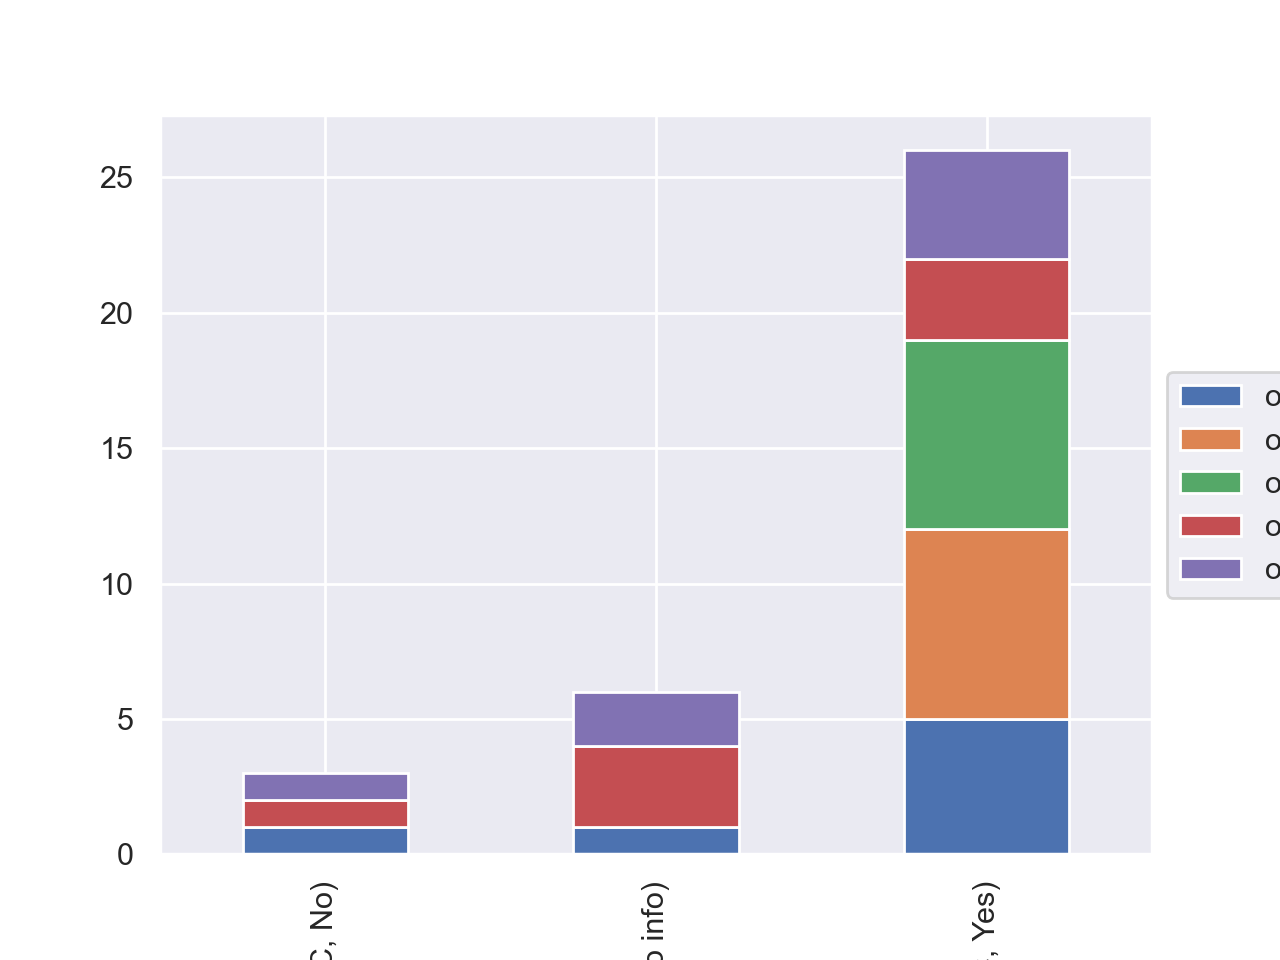

<ipython-input-78-1a21c35c9ee3>:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


In [78]:
#df_HIC = df1.groupby('income_id').get_group('HIC').reset_index().set_index('income_id', 'Response').T
df_HIC = df1.groupby('income_id').get_group('HIC')


df_HIC_info = pd.DataFrame(df_HIC, columns =[
    'other_information_information_system_for_solid_waste_management',
    'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations',
    'other_information_national_law_governing_solid_waste_management_in_the_country',
    'other_information_ppp_rules_and_regulations',
    'other_information_summary_of_key_solid_waste_information_made_available_to_the_public'
       ])
df_HIC_info.plot.bar(legend=True, stacked=True);
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


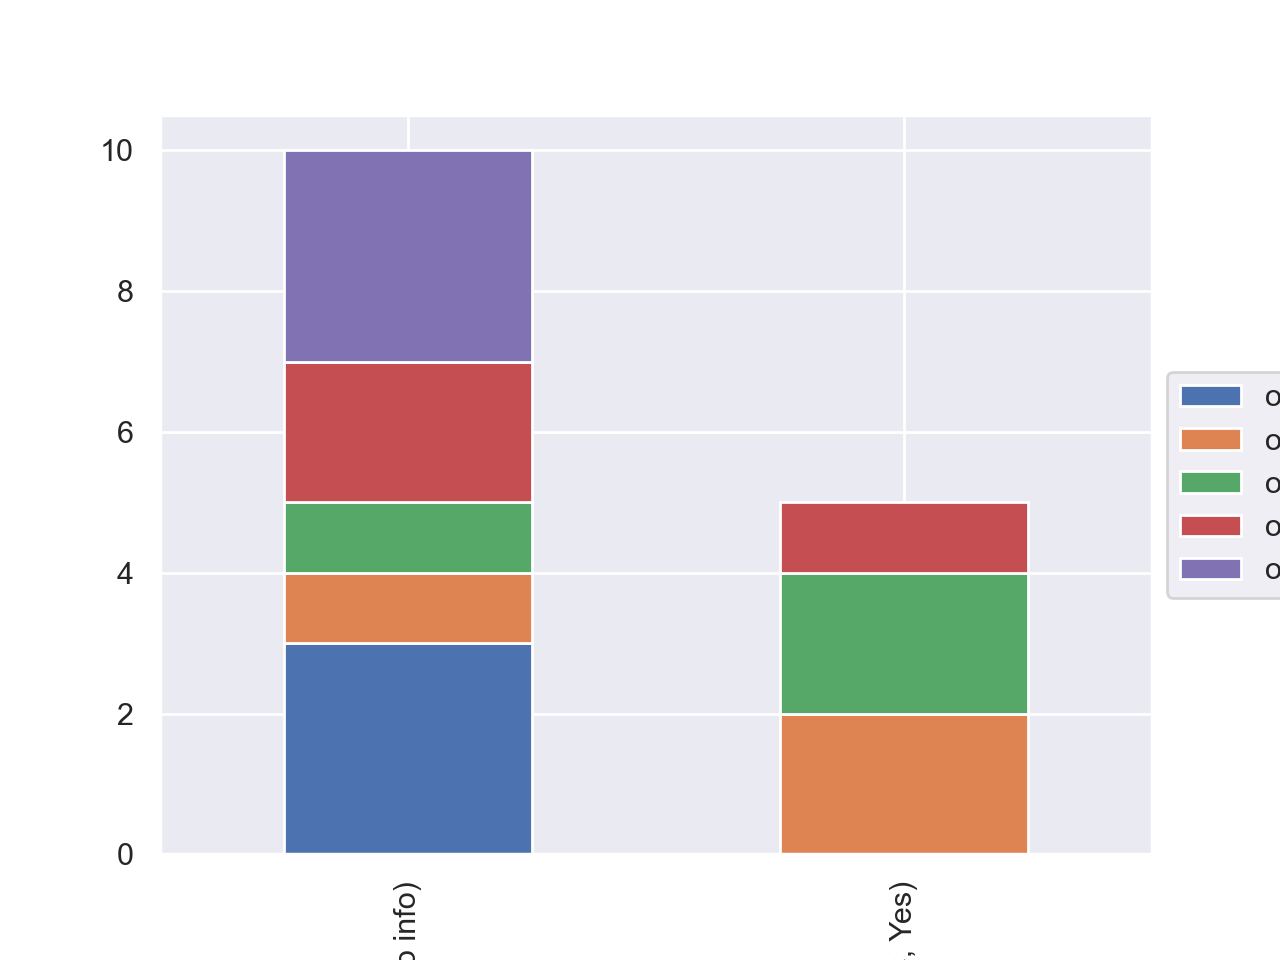

<ipython-input-79-d6be37c20228>:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


In [79]:
df_LIC = df1.groupby('income_id').get_group('LIC')


df_LIC_info = pd.DataFrame(df_LIC, columns =[
    'other_information_information_system_for_solid_waste_management',
    'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations',
    'other_information_national_law_governing_solid_waste_management_in_the_country',
    'other_information_ppp_rules_and_regulations',
    'other_information_summary_of_key_solid_waste_information_made_available_to_the_public'
       ])
df_LIC_info.plot.bar(legend=True, stacked=True);
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


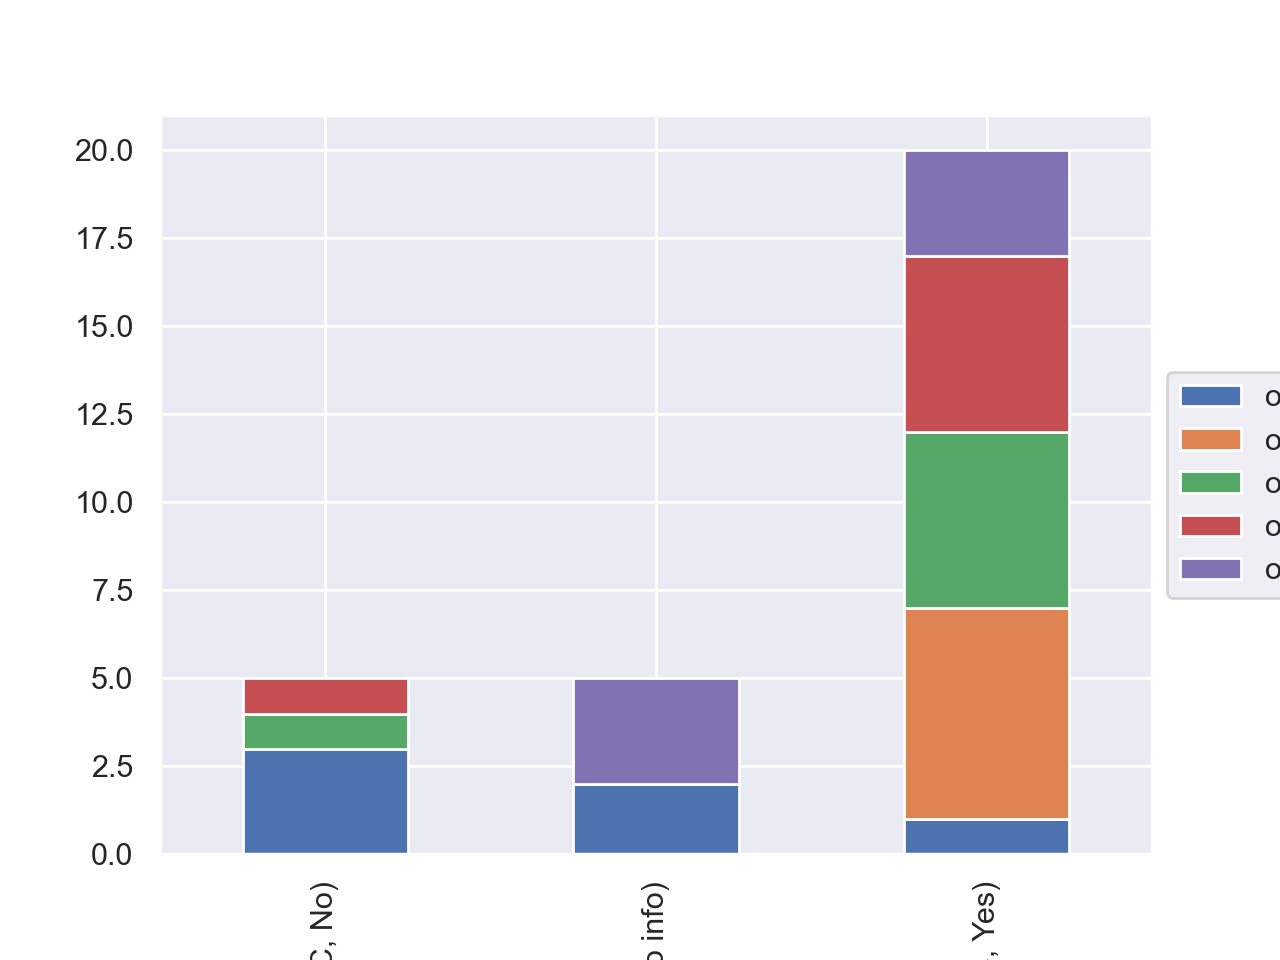

<ipython-input-80-444e03a1fe4d>:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


In [80]:
df_LMC = df1.groupby('income_id').get_group('LMC')


df_LMC_info = pd.DataFrame(df_LMC, columns =[
    'other_information_information_system_for_solid_waste_management',
    'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations',
    'other_information_national_law_governing_solid_waste_management_in_the_country',
    'other_information_ppp_rules_and_regulations',
    'other_information_summary_of_key_solid_waste_information_made_available_to_the_public'
       ])
df_LMC_info.plot.bar(legend=True, stacked=True);
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


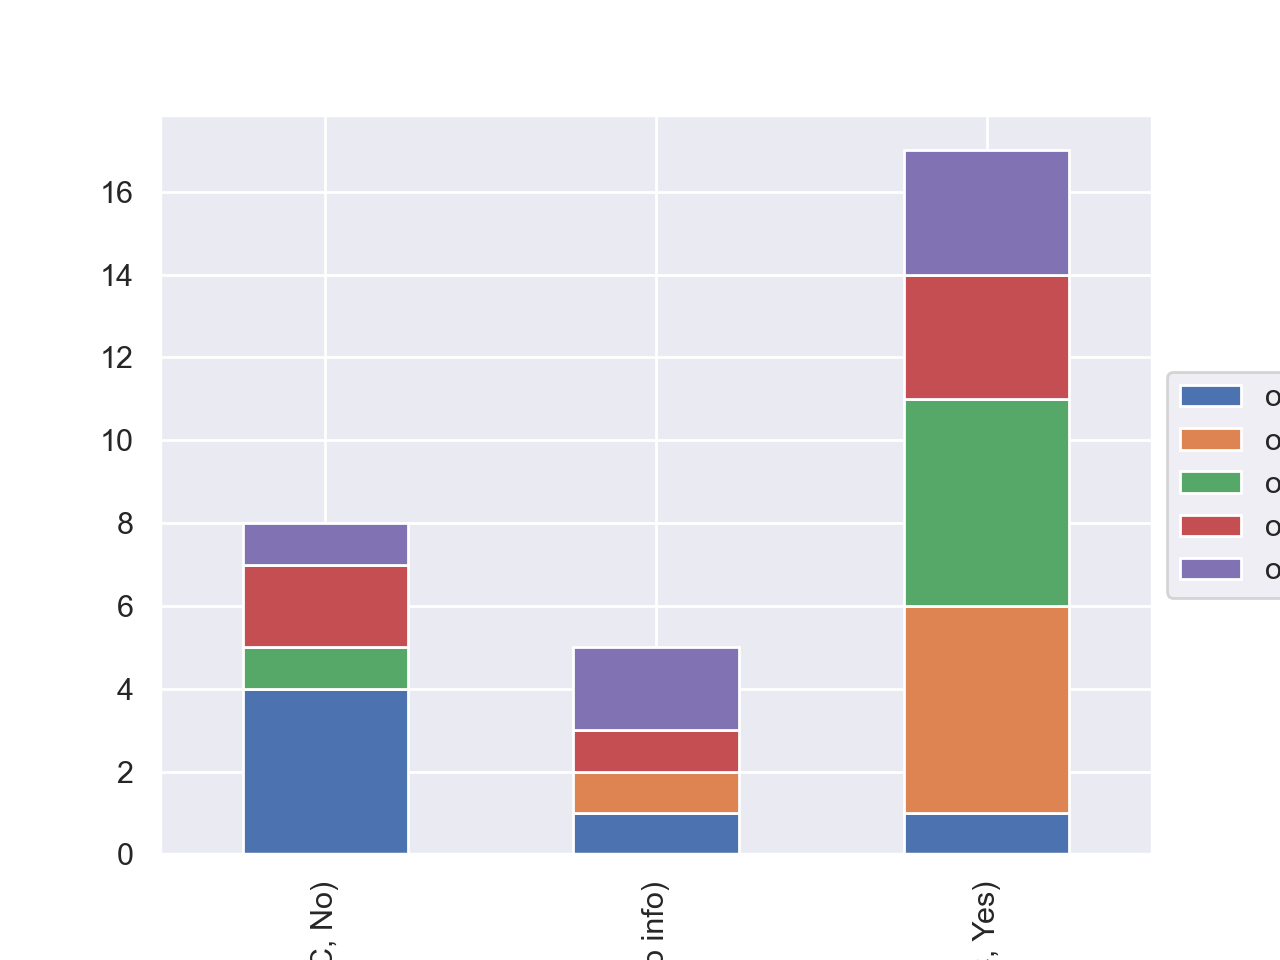

<ipython-input-81-7adcaeae2c05>:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


In [81]:
df_UMC = df1.groupby('income_id').get_group('UMC')


df_UMC_info = pd.DataFrame(df_UMC, columns =[
    'other_information_information_system_for_solid_waste_management',
    'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations',
    'other_information_national_law_governing_solid_waste_management_in_the_country',
    'other_information_ppp_rules_and_regulations',
    'other_information_summary_of_key_solid_waste_information_made_available_to_the_public'
       ])
df_UMC_info.plot.bar(legend=True, stacked=True);
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.tight_layout()

In [82]:
a = df1.reset_index().set_index('income_id', 'Response').T
a

income_id,HIC,HIC,HIC,LIC,LIC,LMC,LMC,LMC,UMC,UMC,UMC
Response,No,No info,Yes,No info,Yes,No,No info,Yes,No,No info,Yes
other_information_information_system_for_solid_waste_management,1,1,5,3,0,3,2,1,4,1,1
other_information_national_agency_to_enforce_solid_waste_laws_and_regulations,0,0,7,1,2,0,0,6,0,1,5
other_information_national_law_governing_solid_waste_management_in_the_country,0,0,7,1,2,1,0,5,1,0,5
other_information_ppp_rules_and_regulations,1,3,3,2,1,1,0,5,2,1,3
other_information_summary_of_key_solid_waste_information_made_available_to_the_public,1,2,4,3,0,0,3,3,1,2,3


<IPython.core.display.Javascript object>


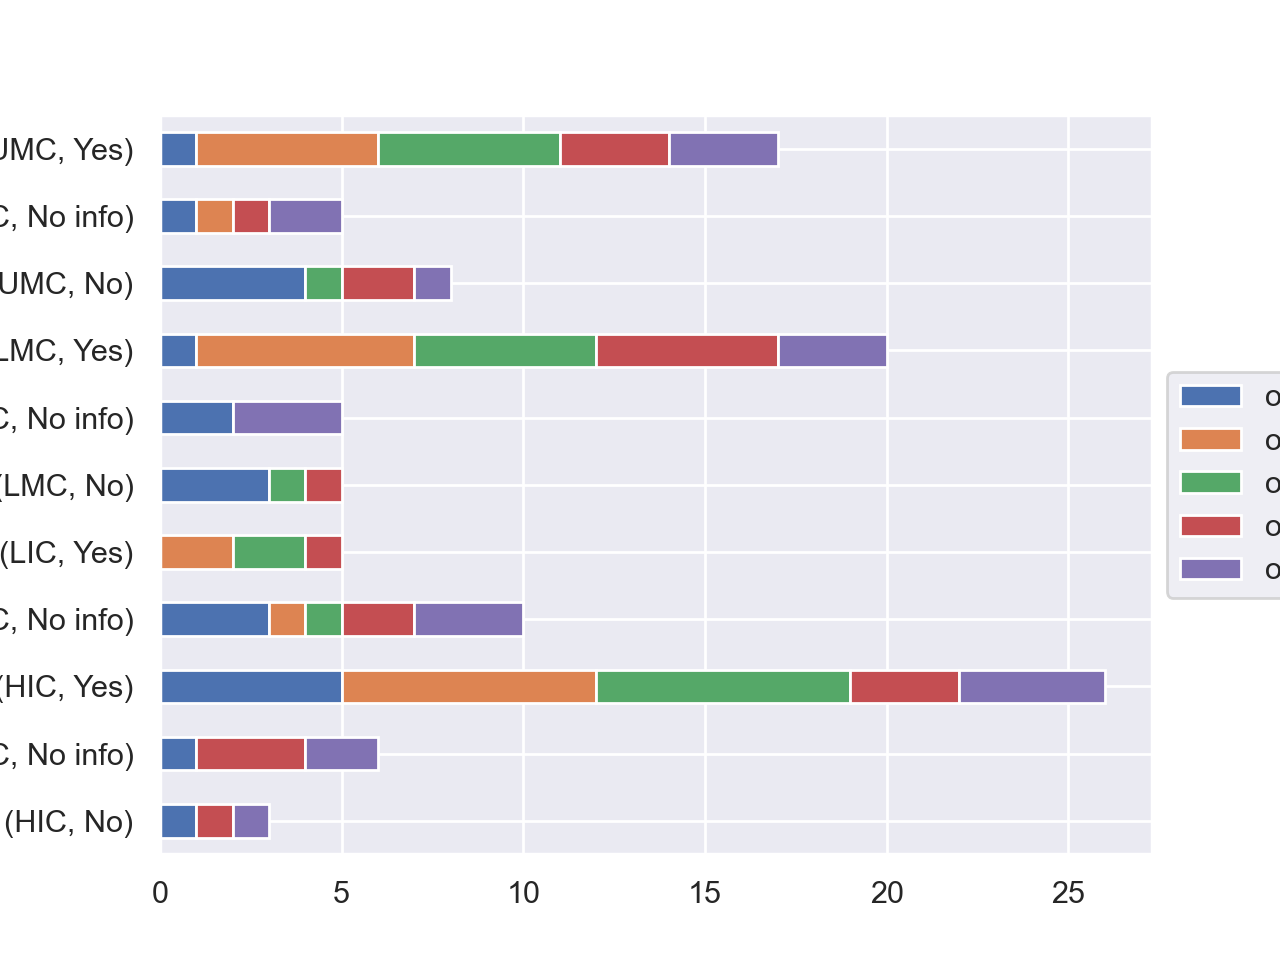

<ipython-input-83-95cbf80613a5>:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


In [83]:
df1_waste_info = pd.DataFrame(df1, columns =[
    'other_information_information_system_for_solid_waste_management',
    'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations',
    'other_information_national_law_governing_solid_waste_management_in_the_country',
    'other_information_ppp_rules_and_regulations',
    'other_information_summary_of_key_solid_waste_information_made_available_to_the_public'
       ])
df1_waste_info.plot.barh(legend=True, stacked=True);
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.tight_layout()

## Special waste

In [84]:
special_waste =  world_group_2017[[
        'country_name', 
        'income_id', 'gdp', 
        'population_population_number_of_people',
        'special_waste_agricultural_waste_tons_year',
        'special_waste_construction_and_demolition_waste_tons_year',
        'special_waste_e_waste_tons_year',
        'special_waste_hazardous_waste_tons_year',
        'special_waste_industrial_waste_tons_year',
        'special_waste_medical_waste_tons_year',
        'total_msw_total_msw_generated_tons_year']]
special_waste.fillna(0).drop_duplicates().set_index('country_name').head(3)

# Nan values converted to zeros 

,income_id,gdp,population_population_number_of_people,special_waste_agricultural_waste_tons_year,special_waste_construction_and_demolition_waste_tons_year,special_waste_e_waste_tons_year,special_waste_hazardous_waste_tons_year,special_waste_industrial_waste_tons_year,special_waste_medical_waste_tons_year,total_msw_total_msw_generated_tons_year
country_name,,,,,,,,,,
Bhutan,LMC,2.234759e+09,686958.0,0.0,0.0,1457.5,0.0,1476.37,358.0,111314.05
Dominican Republic,UMC,7.366413e+10,10528394.0,0.0,0.0,57000.0,0.0,0.00,0.0,4063910.00
Algeria,UMC,1.960348e+11,40606052.0,0.0,11000000.0,252000.0,330000.0,2547000.00,30000.0,12378740.00


In [85]:
special_waste_HIC = special_waste.groupby('income_id').get_group('HIC').fillna(0).drop_duplicates().set_index('country_name')
special_waste_HIC.columns

Index(['income_id', 'gdp', 'population_population_number_of_people',
       'special_waste_agricultural_waste_tons_year',
       'special_waste_construction_and_demolition_waste_tons_year',
       'special_waste_e_waste_tons_year',
       'special_waste_hazardous_waste_tons_year',
       'special_waste_industrial_waste_tons_year',
       'special_waste_medical_waste_tons_year',
       'total_msw_total_msw_generated_tons_year'],
      dtype='object')

<IPython.core.display.Javascript object>


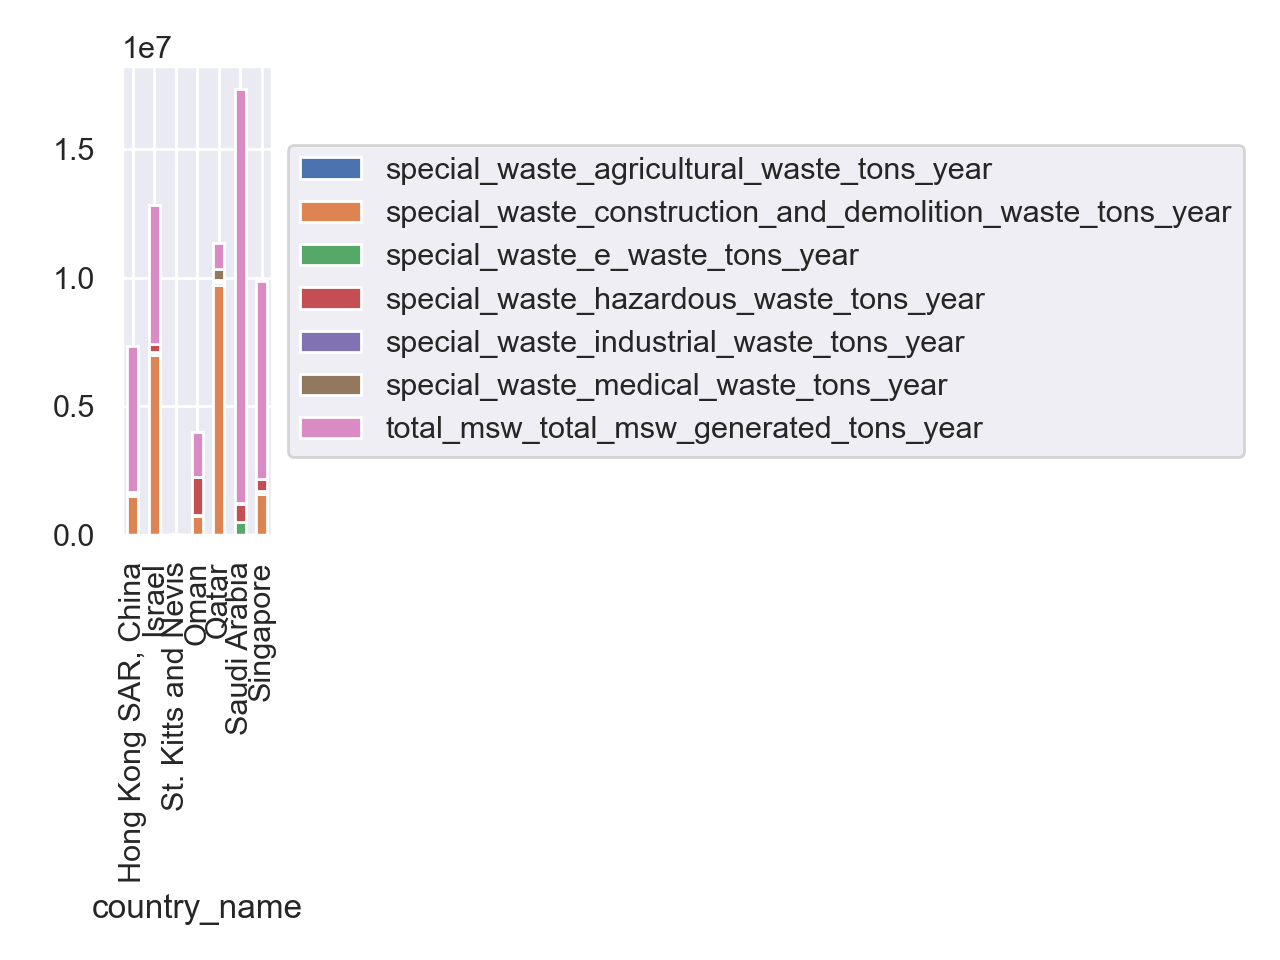

In [86]:
special_waste_HIC = pd.DataFrame(special_waste_HIC, columns =[
       'special_waste_agricultural_waste_tons_year', 
       'special_waste_construction_and_demolition_waste_tons_year',
       'special_waste_e_waste_tons_year',
       'special_waste_hazardous_waste_tons_year',
       'special_waste_industrial_waste_tons_year',
       'special_waste_medical_waste_tons_year',
       'total_msw_total_msw_generated_tons_year'])
special_waste_HIC.plot.bar(legend=True, stacked=True);
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.tight_layout()

In [87]:
special_waste_LIC = special_waste.groupby('income_id').get_group('LIC').fillna(0).drop_duplicates().set_index('country_name')
special_waste_LIC

,income_id,gdp,population_population_number_of_people,special_waste_agricultural_waste_tons_year,special_waste_construction_and_demolition_waste_tons_year,special_waste_e_waste_tons_year,special_waste_hazardous_waste_tons_year,special_waste_industrial_waste_tons_year,special_waste_medical_waste_tons_year,total_msw_total_msw_generated_tons_year
country_name,,,,,,,,,,
Ethiopia,LIC,5.234723e+10,99873033.0,0.0,0.0,49000.0,0.0,0.0,0.00,6532786.970
Nepal,LIC,1.985663e+10,28982771.0,0.0,0.0,23000.0,5051.0,0.0,13408.27,1768977.490
Uganda,LIC,2.748306e+10,35093648.0,0.0,0.0,25000.0,0.0,0.0,0.00,7045049.836


<IPython.core.display.Javascript object>


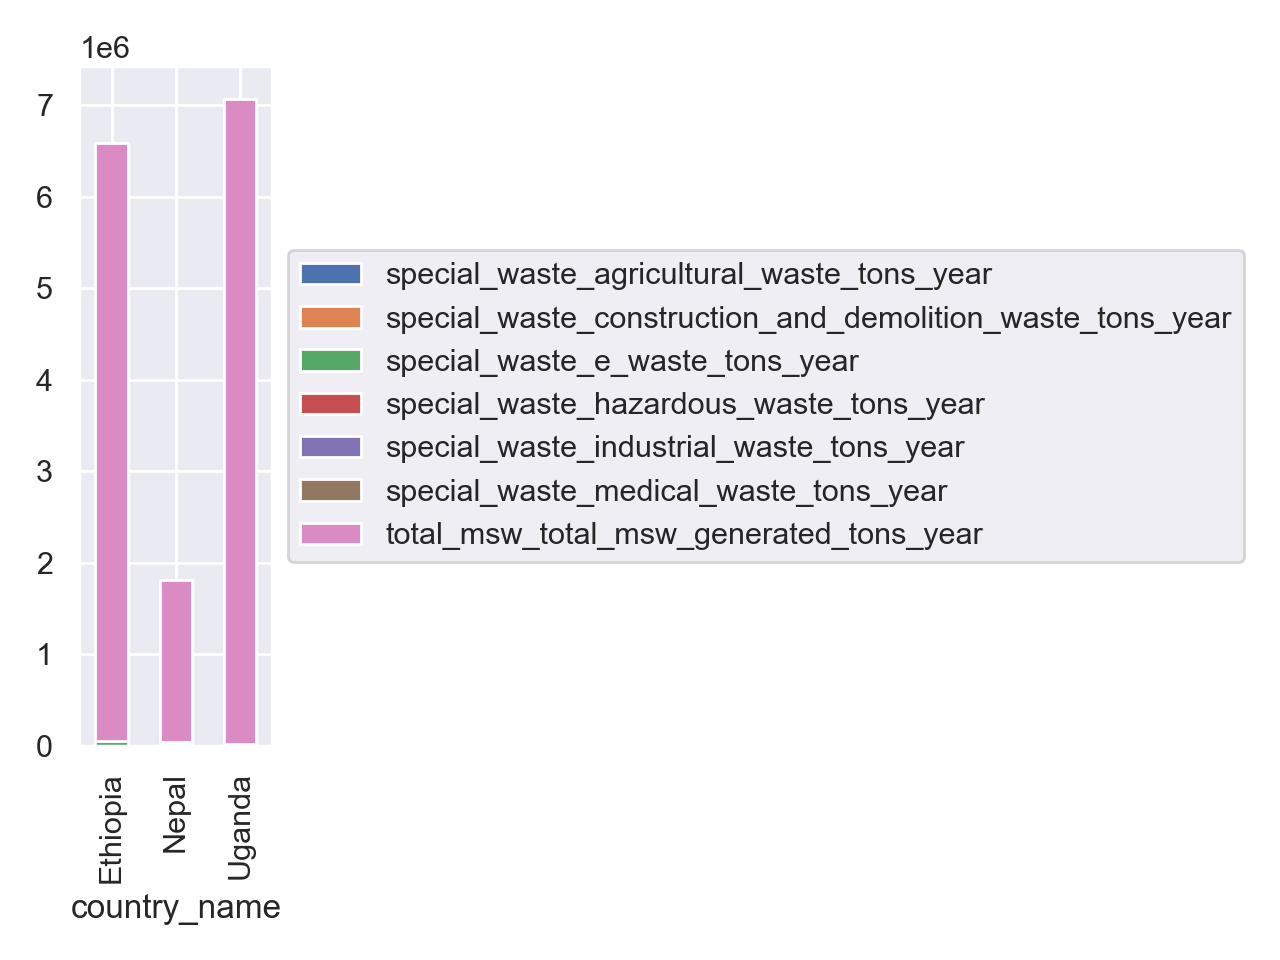

In [88]:
special_waste_LIC = pd.DataFrame(special_waste_LIC, columns =[
       'special_waste_agricultural_waste_tons_year', 
       'special_waste_construction_and_demolition_waste_tons_year',
       'special_waste_e_waste_tons_year',
       'special_waste_hazardous_waste_tons_year',
       'special_waste_industrial_waste_tons_year',
       'special_waste_medical_waste_tons_year',
       'total_msw_total_msw_generated_tons_year'])
special_waste_LIC.plot.bar(legend=True, stacked=True);
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.tight_layout()

In [89]:
special_waste_LMC = special_waste.groupby('income_id').get_group('LMC').fillna(0).drop_duplicates().set_index('country_name')
special_waste_LMC

,income_id,gdp,population_population_number_of_people,special_waste_agricultural_waste_tons_year,special_waste_construction_and_demolition_waste_tons_year,special_waste_e_waste_tons_year,special_waste_hazardous_waste_tons_year,special_waste_industrial_waste_tons_year,special_waste_medical_waste_tons_year,total_msw_total_msw_generated_tons_year
country_name,,,,,,,,,,
Bhutan,LMC,2.234759e+09,6.869580e+05,0.0,0.0,1457.5,0.0,1476.37,358.0,1.113141e+05
Indonesia,LMC,1.037864e+12,2.611155e+08,122000000.0,0.0,1274000.0,23000000.0,0.00,82125.0,6.520000e+07
India,LMC,2.466177e+12,1.071478e+09,0.0,27500000.0,1700000.0,7467000.0,0.00,180784.5,1.684032e+08
Sri Lanka,LMC,7.990704e+10,2.120300e+07,0.0,65700.0,72.5,0.0,53000.00,9855.0,2.631650e+06
Myanmar,LMC,7.446983e+10,4.609546e+07,0.0,0.0,55000.0,0.0,54750.00,648.2,4.677307e+06
Pakistan,LMC,2.278669e+11,1.932035e+08,82120000.0,0.0,301000.0,1538000.0,0.00,292000000.0,3.076000e+07


<IPython.core.display.Javascript object>


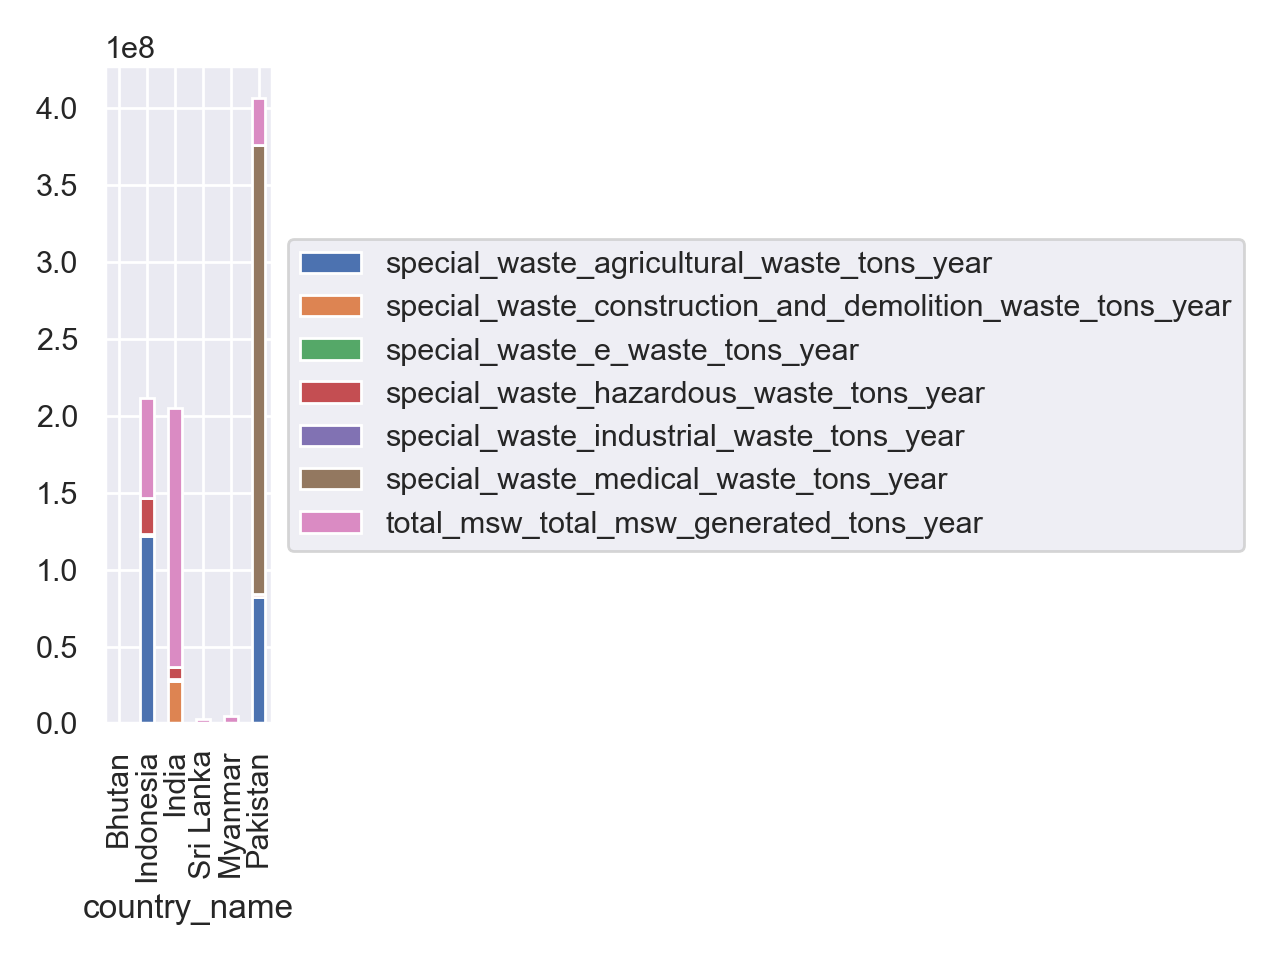

In [90]:
special_waste_LMC = pd.DataFrame(special_waste_LMC, columns =[
       'special_waste_agricultural_waste_tons_year', 
       'special_waste_construction_and_demolition_waste_tons_year',
       'special_waste_e_waste_tons_year',
       'special_waste_hazardous_waste_tons_year',
       'special_waste_industrial_waste_tons_year',
       'special_waste_medical_waste_tons_year',
       'total_msw_total_msw_generated_tons_year'])
special_waste_LMC.plot.bar(legend=True, stacked=True);
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.tight_layout()

In [91]:
special_waste_UMC = special_waste.groupby('income_id').get_group('UMC').fillna(0).drop_duplicates().set_index('country_name')
special_waste_UMC

,income_id,gdp,population_population_number_of_people,special_waste_agricultural_waste_tons_year,special_waste_construction_and_demolition_waste_tons_year,special_waste_e_waste_tons_year,special_waste_hazardous_waste_tons_year,special_waste_industrial_waste_tons_year,special_waste_medical_waste_tons_year,total_msw_total_msw_generated_tons_year
country_name,,,,,,,,,,
Dominican Republic,UMC,7.366413e+10,10528394.0,0.0,0.0,57000.00,0.000,0.0,0.0,4063910.00
Algeria,UMC,1.960348e+11,40606052.0,0.0,11000000.0,252000.00,330000.000,2547000.0,30000.0,12378740.00
"Iran, Islamic Rep.",UMC,5.405812e+11,80277428.0,16049000.0,80000000.0,630000.00,8000000.000,30000000.0,1609650.0,17885000.00
Maldives,UMC,3.600399e+09,409163.0,0.0,6161.2,3003.95,15105.525,0.0,1737.4,211505.78
Mauritius,UMC,1.240984e+10,1263473.0,0.0,0.0,11000.00,17000.000,0.0,0.0,438000.00
Malaysia,UMC,3.440523e+11,30228017.0,42000000.0,0.0,280000.00,2918478.000,831835.0,19500.0,12982685.00


<IPython.core.display.Javascript object>


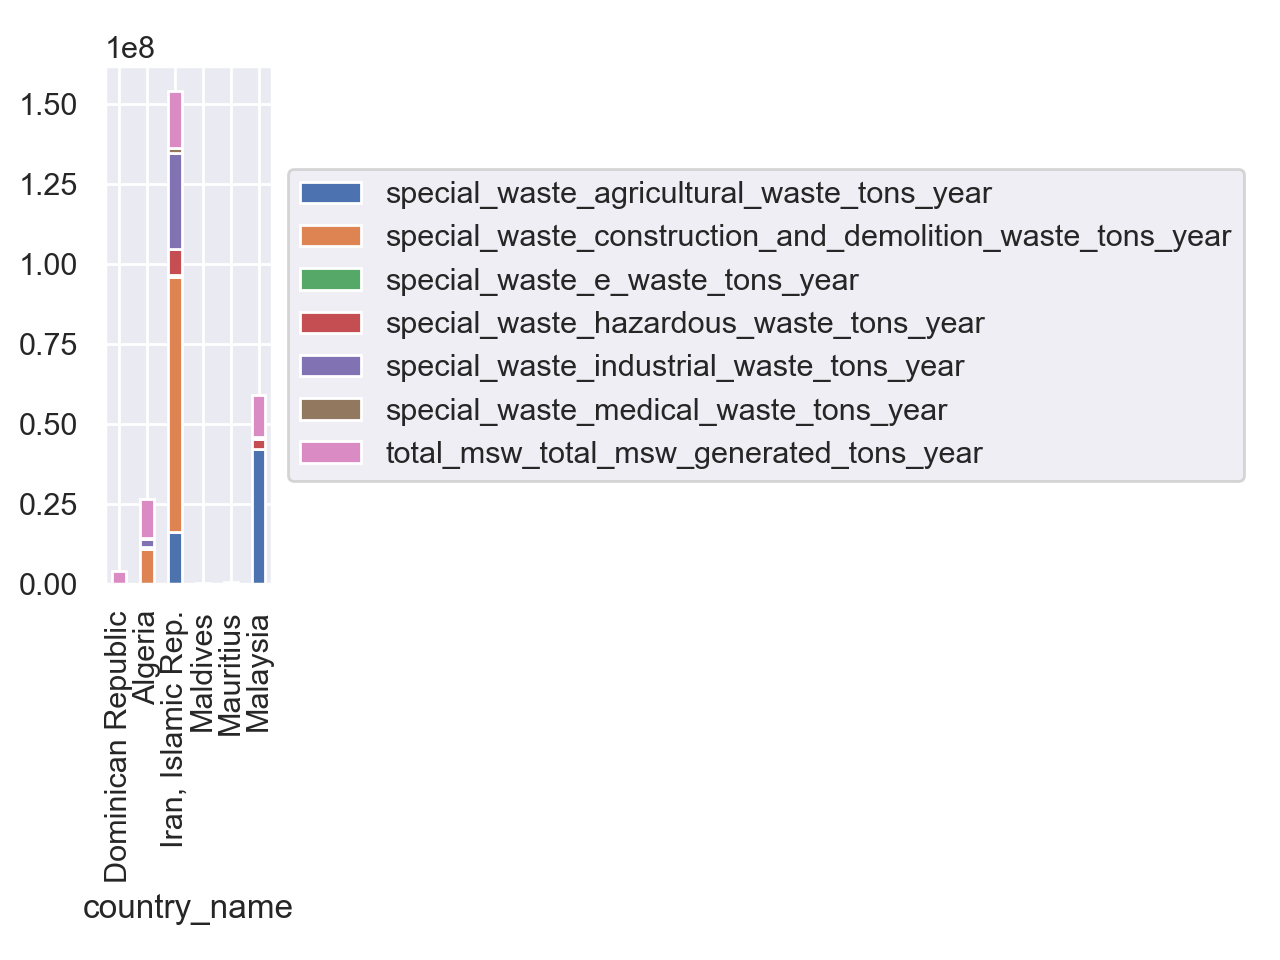

In [92]:
special_waste_UMC = pd.DataFrame(special_waste_UMC, columns =[
       'special_waste_agricultural_waste_tons_year', 
       'special_waste_construction_and_demolition_waste_tons_year',
       'special_waste_e_waste_tons_year',
       'special_waste_hazardous_waste_tons_year',
       'special_waste_industrial_waste_tons_year',
       'special_waste_medical_waste_tons_year',
       'total_msw_total_msw_generated_tons_year'])
special_waste_UMC.plot.bar(legend=True, stacked=True);
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.tight_layout()

## Waste Collection

In [93]:
waste_collection = world_group_2017[[
        'country_name', 
        'income_id', 'gdp', 
        'population_population_number_of_people',
        'waste_collection_coverage_rural_percent_of_geographic_area',
        'waste_collection_coverage_rural_percent_of_households',
        'waste_collection_coverage_rural_percent_of_population',
        'waste_collection_coverage_rural_percent_of_waste',
        'waste_collection_coverage_total_percent_of_geographic_area',
        'waste_collection_coverage_total_percent_of_households',
        'waste_collection_coverage_total_percent_of_population',
        'waste_collection_coverage_total_percent_of_waste',
        'waste_collection_coverage_urban_percent_of_geographic_area',
        'waste_collection_coverage_urban_percent_of_households',
        'waste_collection_coverage_urban_percent_of_population',
        'waste_collection_coverage_urban_percent_of_waste'
]]
waste_collection.fillna(0).drop_duplicates().set_index('country_name').head(3)


# converted Nan values to zeros

,income_id,gdp,population_population_number_of_people,waste_collection_coverage_rural_percent_of_geographic_area,waste_collection_coverage_rural_percent_of_households,waste_collection_coverage_rural_percent_of_population,waste_collection_coverage_rural_percent_of_waste,waste_collection_coverage_total_percent_of_geographic_area,waste_collection_coverage_total_percent_of_households,waste_collection_coverage_total_percent_of_population,waste_collection_coverage_total_percent_of_waste,waste_collection_coverage_urban_percent_of_geographic_area,waste_collection_coverage_urban_percent_of_households,waste_collection_coverage_urban_percent_of_population,waste_collection_coverage_urban_percent_of_waste
country_name,,,,,,,,,,,,,,,
Bhutan,LMC,2.234759e+09,686958.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0
Dominican Republic,UMC,7.366413e+10,10528394.0,0.0,0.0,0.0,0.0,0.0,74.9,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,UMC,1.960348e+11,40606052.0,0.0,0.0,87.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.5,0.0


In [94]:
waste_treatment = world_group_2017[[
        'country_name', 
        'income_id', 'gdp', 
        'population_population_number_of_people',
        'waste_treatment_anaerobic_digestion_percent',
        'waste_treatment_compost_percent',
        'waste_treatment_controlled_landfill_percent',
        'waste_treatment_incineration_percent',
        'waste_treatment_landfill_unspecified_percent',
        'waste_treatment_open_dump_percent', 'waste_treatment_other_percent',
        'waste_treatment_recycling_percent',
        'waste_treatment_sanitary_landfill_landfill_gas_system_percent',
        'waste_treatment_unaccounted_for_percent']]
waste_treatment.fillna(0).drop_duplicates().set_index('country_name').head(3)


# Nan values converted to zeros

,income_id,gdp,population_population_number_of_people,waste_treatment_anaerobic_digestion_percent,waste_treatment_compost_percent,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent
country_name,,,,,,,,,,,,,
Bhutan,LMC,2.234759e+09,686958.0,0.0,1.39,98.0,0.0,0.0,0.000000,0.0,0.86,0.0,0.000000
Dominican Republic,UMC,7.366413e+10,10528394.0,0.0,0.00,0.0,0.0,0.0,72.575831,0.0,8.20,0.1,19.124169
Algeria,UMC,1.960348e+11,40606052.0,0.0,1.00,2.0,0.0,0.0,0.000000,0.0,8.00,89.0,0.000000


In [95]:
waste_treatment_LIC = waste_treatment.groupby('income_id').get_group('LIC').fillna(0).drop_duplicates().set_index('country_name')
waste_treatment_LIC

,income_id,gdp,population_population_number_of_people,waste_treatment_anaerobic_digestion_percent,waste_treatment_compost_percent,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent
country_name,,,,,,,,,,,,,
Ethiopia,LIC,5.234723e+10,99873033.0,0.0,0.00,0.0,0.0,0.0,43.0,0.0,0.0,0.0,57.00
Nepal,LIC,1.985663e+10,28982771.0,0.0,2.87,0.0,0.0,37.0,0.0,0.0,0.0,0.0,60.13
Uganda,LIC,2.748306e+10,35093648.0,0.0,0.00,0.0,0.0,0.0,87.0,0.0,6.0,7.0,0.00


<IPython.core.display.Javascript object>


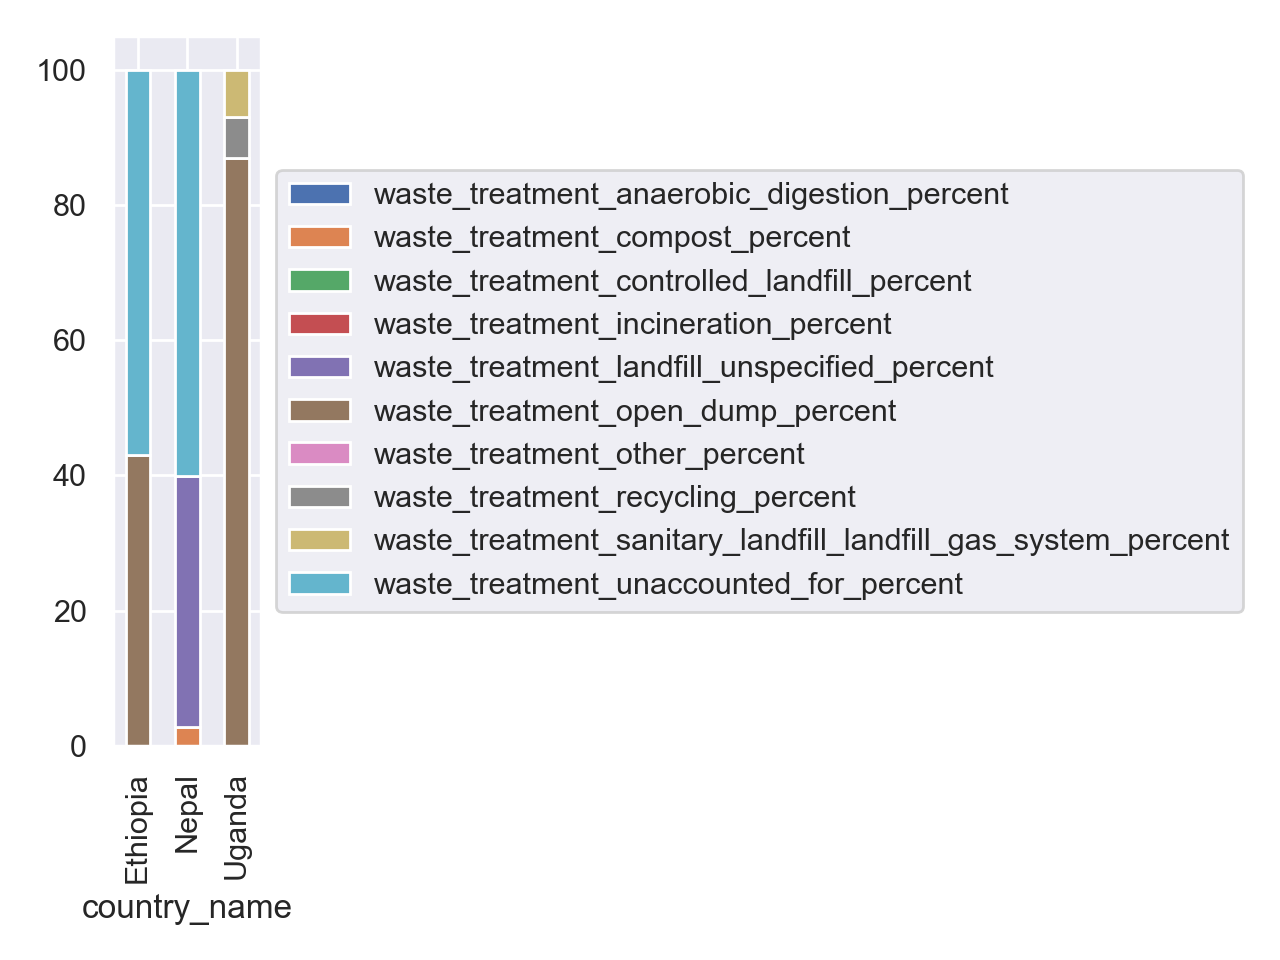

In [96]:
waste_treatment_LIC = pd.DataFrame(waste_treatment_LIC, columns =[
       'waste_treatment_anaerobic_digestion_percent',
       'waste_treatment_compost_percent',
       'waste_treatment_controlled_landfill_percent',
       'waste_treatment_incineration_percent',
       'waste_treatment_landfill_unspecified_percent',
       'waste_treatment_open_dump_percent', 'waste_treatment_other_percent',
       'waste_treatment_recycling_percent',
       'waste_treatment_sanitary_landfill_landfill_gas_system_percent',
       'waste_treatment_unaccounted_for_percent'])
waste_treatment_LIC.plot.bar(legend=True, stacked=True);
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.tight_layout()

In [97]:
waste_treatment_LMC = waste_treatment.groupby('income_id').get_group('LMC').fillna(0).drop_duplicates().set_index('country_name')
waste_treatment_LMC

,income_id,gdp,population_population_number_of_people,waste_treatment_anaerobic_digestion_percent,waste_treatment_compost_percent,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent
country_name,,,,,,,,,,,,,
Bhutan,LMC,2.234759e+09,6.869580e+05,0.0,1.39,98.0,0.0,0.0,0.0,0.0,0.86,0.0,0.0
Indonesia,LMC,1.037864e+12,2.611155e+08,0.0,0.00,0.0,0.0,69.0,10.0,14.0,7.00,0.0,0.0
India,LMC,2.466177e+12,1.071478e+09,0.0,18.00,0.0,0.0,0.0,77.0,0.0,5.00,0.0,0.0
Sri Lanka,LMC,7.990704e+10,2.120300e+07,0.0,5.00,0.0,0.0,0.0,85.0,0.0,12.79,0.0,0.0
Myanmar,LMC,7.446983e+10,4.609546e+07,0.0,0.00,0.0,0.0,0.0,0.0,8.0,0.00,0.0,92.0
Pakistan,LMC,2.278669e+11,1.932035e+08,0.0,2.00,0.0,0.0,40.0,50.0,0.0,8.00,0.0,0.0


<IPython.core.display.Javascript object>


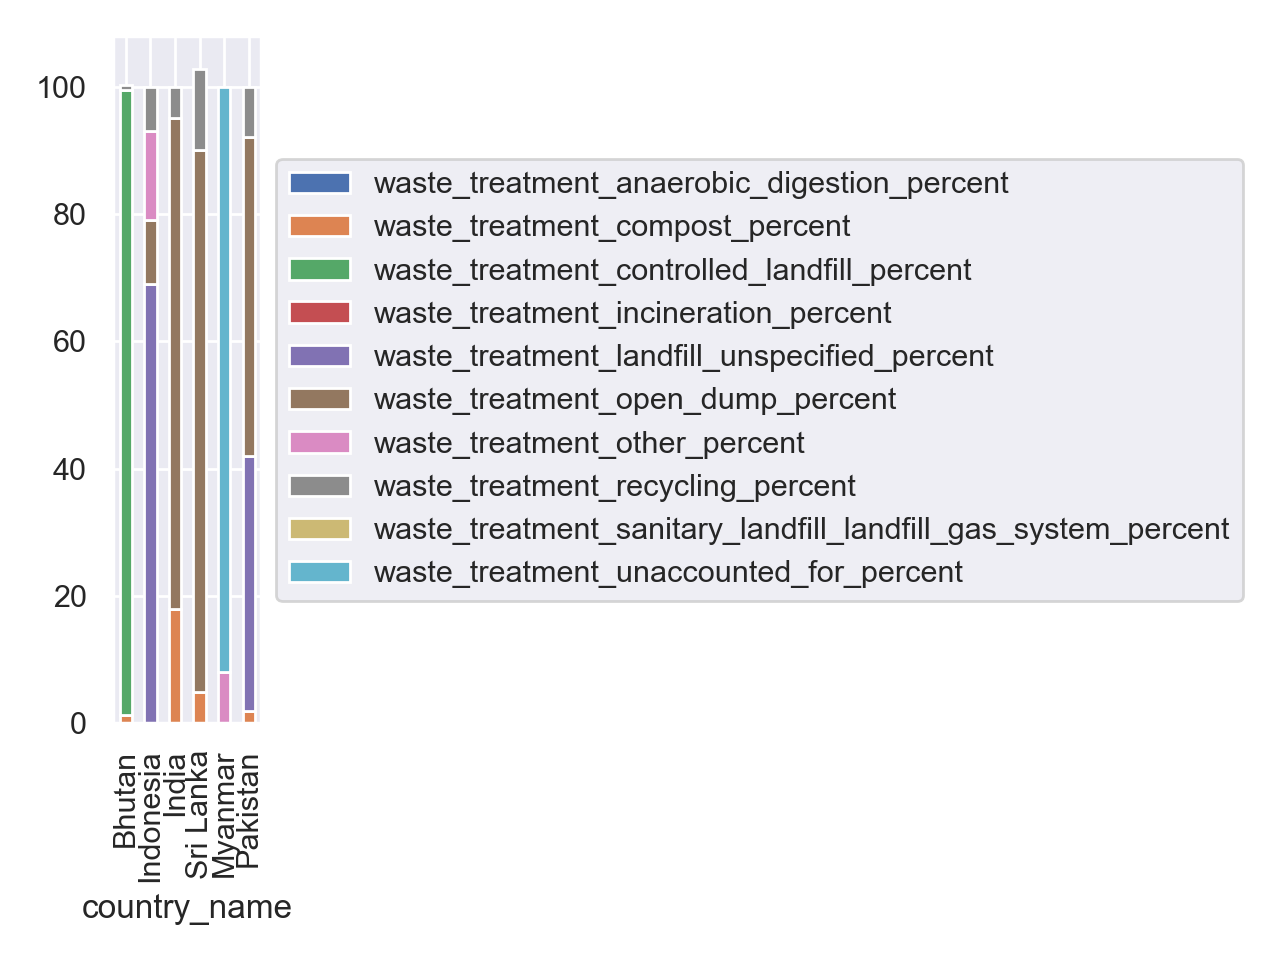

In [98]:
waste_treatment_LMC = pd.DataFrame(waste_treatment_LMC, columns =[
       'waste_treatment_anaerobic_digestion_percent',
       'waste_treatment_compost_percent',
       'waste_treatment_controlled_landfill_percent',
       'waste_treatment_incineration_percent',
       'waste_treatment_landfill_unspecified_percent',
       'waste_treatment_open_dump_percent', 'waste_treatment_other_percent',
       'waste_treatment_recycling_percent',
       'waste_treatment_sanitary_landfill_landfill_gas_system_percent',
       'waste_treatment_unaccounted_for_percent'])
waste_treatment_LMC.plot.bar(legend=True, stacked=True);
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.tight_layout()

In [99]:
waste_treatment_UMC = waste_treatment.groupby('income_id').get_group('UMC').fillna(0).drop_duplicates().set_index('country_name')
waste_treatment_UMC

,income_id,gdp,population_population_number_of_people,waste_treatment_anaerobic_digestion_percent,waste_treatment_compost_percent,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent
country_name,,,,,,,,,,,,,
Dominican Republic,UMC,7.366413e+10,10528394.0,0.0,0.0,0.0,0.0,0.0,72.575831,0.0,8.2,0.1,19.124169
Algeria,UMC,1.960348e+11,40606052.0,0.0,1.0,2.0,0.0,0.0,0.000000,0.0,8.0,89.0,0.000000
"Iran, Islamic Rep.",UMC,5.405812e+11,80277428.0,0.3,12.0,10.0,0.4,0.0,72.000000,0.0,5.0,0.0,0.300000
Maldives,UMC,3.600399e+09,409163.0,0.0,7.0,0.0,6.0,0.0,0.000000,24.0,0.0,0.0,0.000000
Mauritius,UMC,1.240984e+10,1263473.0,0.0,9.0,0.0,0.0,0.0,0.000000,0.0,0.0,91.0,0.000000
Malaysia,UMC,3.440523e+11,30228017.0,0.0,1.0,0.0,0.0,71.5,0.000000,0.0,17.5,10.0,0.000000


<IPython.core.display.Javascript object>


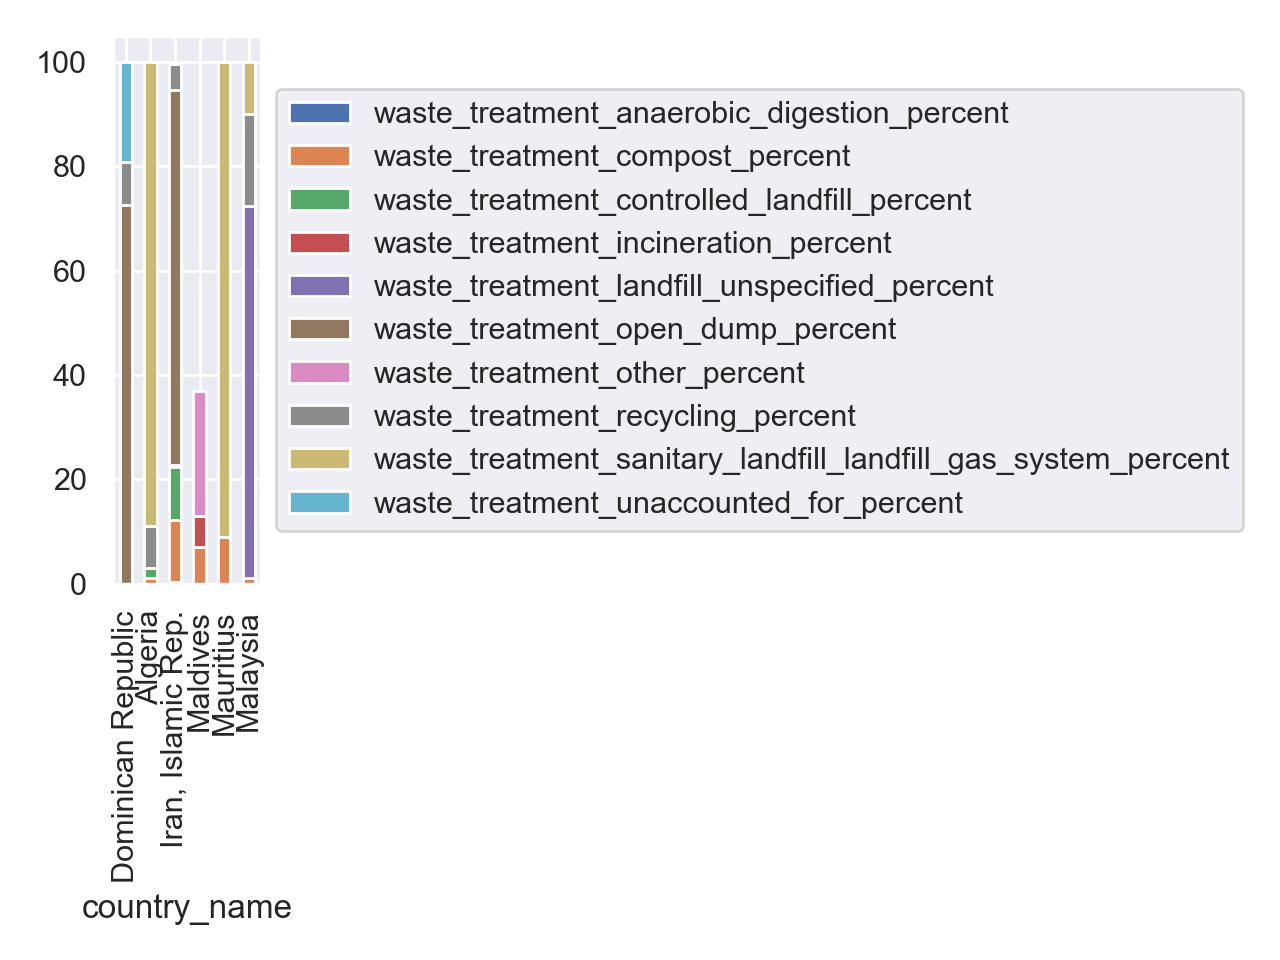

In [100]:
waste_treatment_UMC = pd.DataFrame(waste_treatment_UMC, columns =[
       'waste_treatment_anaerobic_digestion_percent',
       'waste_treatment_compost_percent',
       'waste_treatment_controlled_landfill_percent',
       'waste_treatment_incineration_percent',
       'waste_treatment_landfill_unspecified_percent',
       'waste_treatment_open_dump_percent', 'waste_treatment_other_percent',
       'waste_treatment_recycling_percent',
       'waste_treatment_sanitary_landfill_landfill_gas_system_percent',
       'waste_treatment_unaccounted_for_percent'])
waste_treatment_UMC.plot.bar(legend=True, stacked=True);
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.tight_layout()

In [101]:
waste_treatment_HIC = waste_treatment.groupby('income_id').get_group('HIC').fillna(0).drop_duplicates().set_index('country_name')
waste_treatment_HIC

,income_id,gdp,population_population_number_of_people,waste_treatment_anaerobic_digestion_percent,waste_treatment_compost_percent,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent
country_name,,,,,,,,,,,,,
"Hong Kong SAR, China",HIC,2.701054e+11,7305700.0,0.0,0.0,0.00,0.0,66.0,0.00,0.0,34.0,0.0,0.0
Israel,HIC,2.878076e+11,8380100.0,0.0,0.0,0.00,0.0,75.0,0.00,0.0,25.0,0.0,0.0
St. Kitts and Nevis,HIC,8.583447e+08,54288.0,0.0,0.0,100.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0
Oman,HIC,7.505436e+10,3960925.0,0.0,0.0,0.01,0.0,0.0,99.99,0.0,0.0,0.0,0.0
Qatar,HIC,1.706626e+11,2109568.0,0.0,0.0,0.00,4.0,93.0,0.00,0.0,3.0,0.0,0.0
Saudi Arabia,HIC,6.900688e+11,31557144.0,0.0,0.0,85.00,0.0,0.0,0.00,0.0,15.0,0.0,0.0
Singapore,HIC,2.991701e+11,5607283.0,0.0,0.0,0.00,37.0,2.0,0.00,0.0,61.0,0.0,0.0


<IPython.core.display.Javascript object>


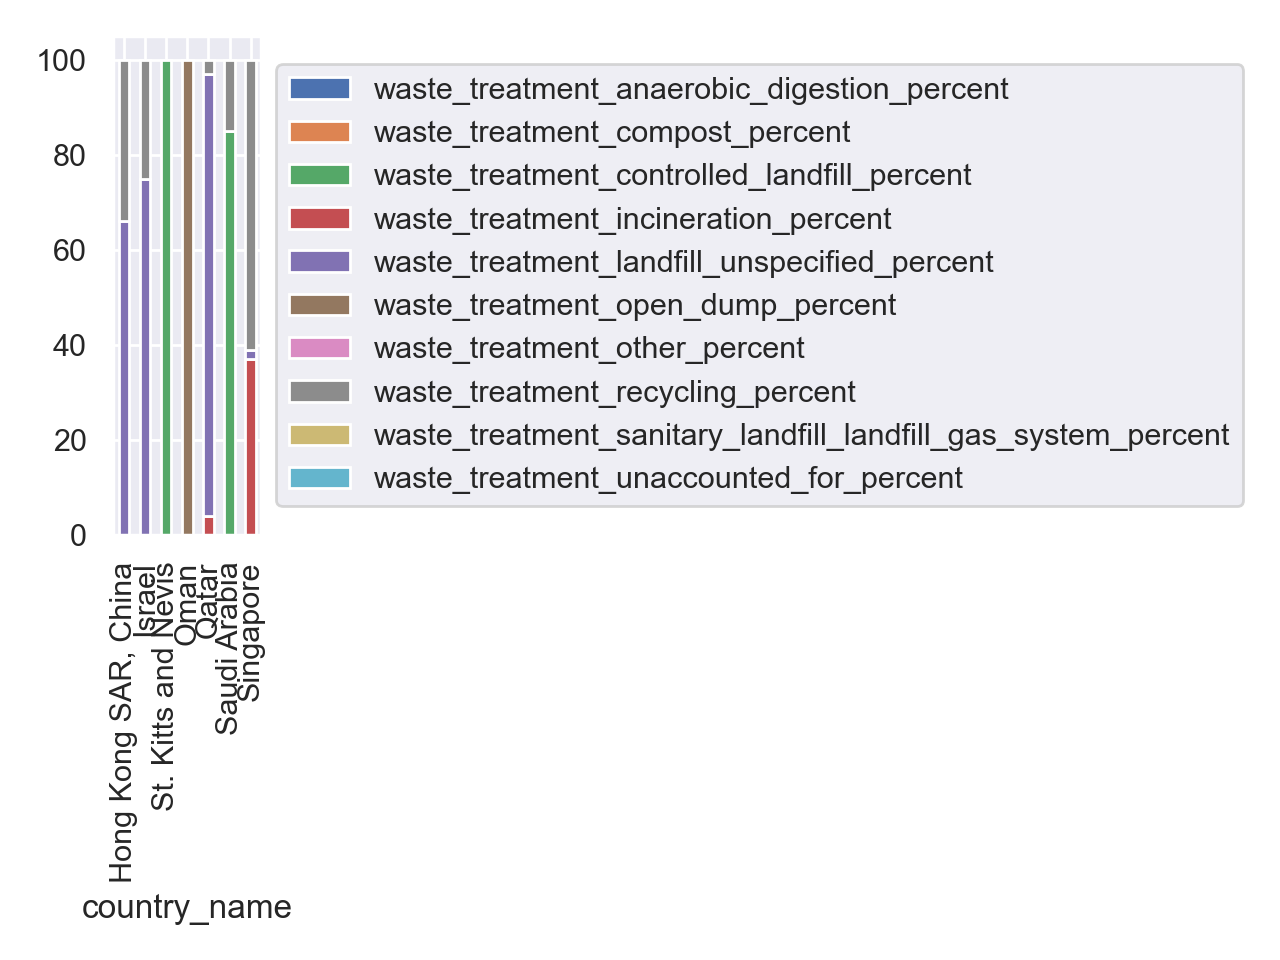

In [102]:
waste_treatment_HIC = pd.DataFrame(waste_treatment_HIC, columns =[
       'waste_treatment_anaerobic_digestion_percent',
       'waste_treatment_compost_percent',
       'waste_treatment_controlled_landfill_percent',
       'waste_treatment_incineration_percent',
       'waste_treatment_landfill_unspecified_percent',
       'waste_treatment_open_dump_percent', 'waste_treatment_other_percent',
       'waste_treatment_recycling_percent',
       'waste_treatment_sanitary_landfill_landfill_gas_system_percent',
       'waste_treatment_unaccounted_for_percent'])
waste_treatment_HIC.plot.bar(legend=True, stacked=True);
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.tight_layout()